<a href="https://colab.research.google.com/github/beaamoo/Machine-Learning-Demonstration/blob/main/decision-tree-classifier-Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classifier with Iris Dataset

## Import libraries

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

## Load Dataset

Print what the dependent values look like including their names

In [2]:
data = load_iris()

print(data.data[:5])
print(data.feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
print(data.target[:10])
print(data.target_names)

[0 0 0 0 0 0 0 0 0 0]
['setosa' 'versicolor' 'virginica']


The first 10 values are all setosa so data seems to have an order potentially.

## Create a train & test data split for training and testing the model

The train_test_split function makes it easy to create train and test partitions on the data. The output includes X_train and y_train, which are used for training the model by observing the independent variables and target values, and X_test and y_test, which are used for testing the model and evaluating its outcomes. X_test is used for making predictions and the results are often denoted as yhat.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

## Construct the Decision Tree Classification Model

In [5]:
DT=DecisionTreeClassifier(criterion="entropy", max_depth=None)

## Train the model

In [6]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

## Predict with the model

Once the model is trained, we can use it for prediction by feeding it the test partition data without the target values. We can then evaluate the model's performance by comparing its output (yhat) with the target values we already have (y_test).

In [7]:
yhat=DT.predict(X_test)

print (yhat [0:5])
print (y_test [0:5])

[0 2 1 2 1]
[0 2 1 2 1]


## Decision Tree Visualization

### Dendrogram 
plot_tree

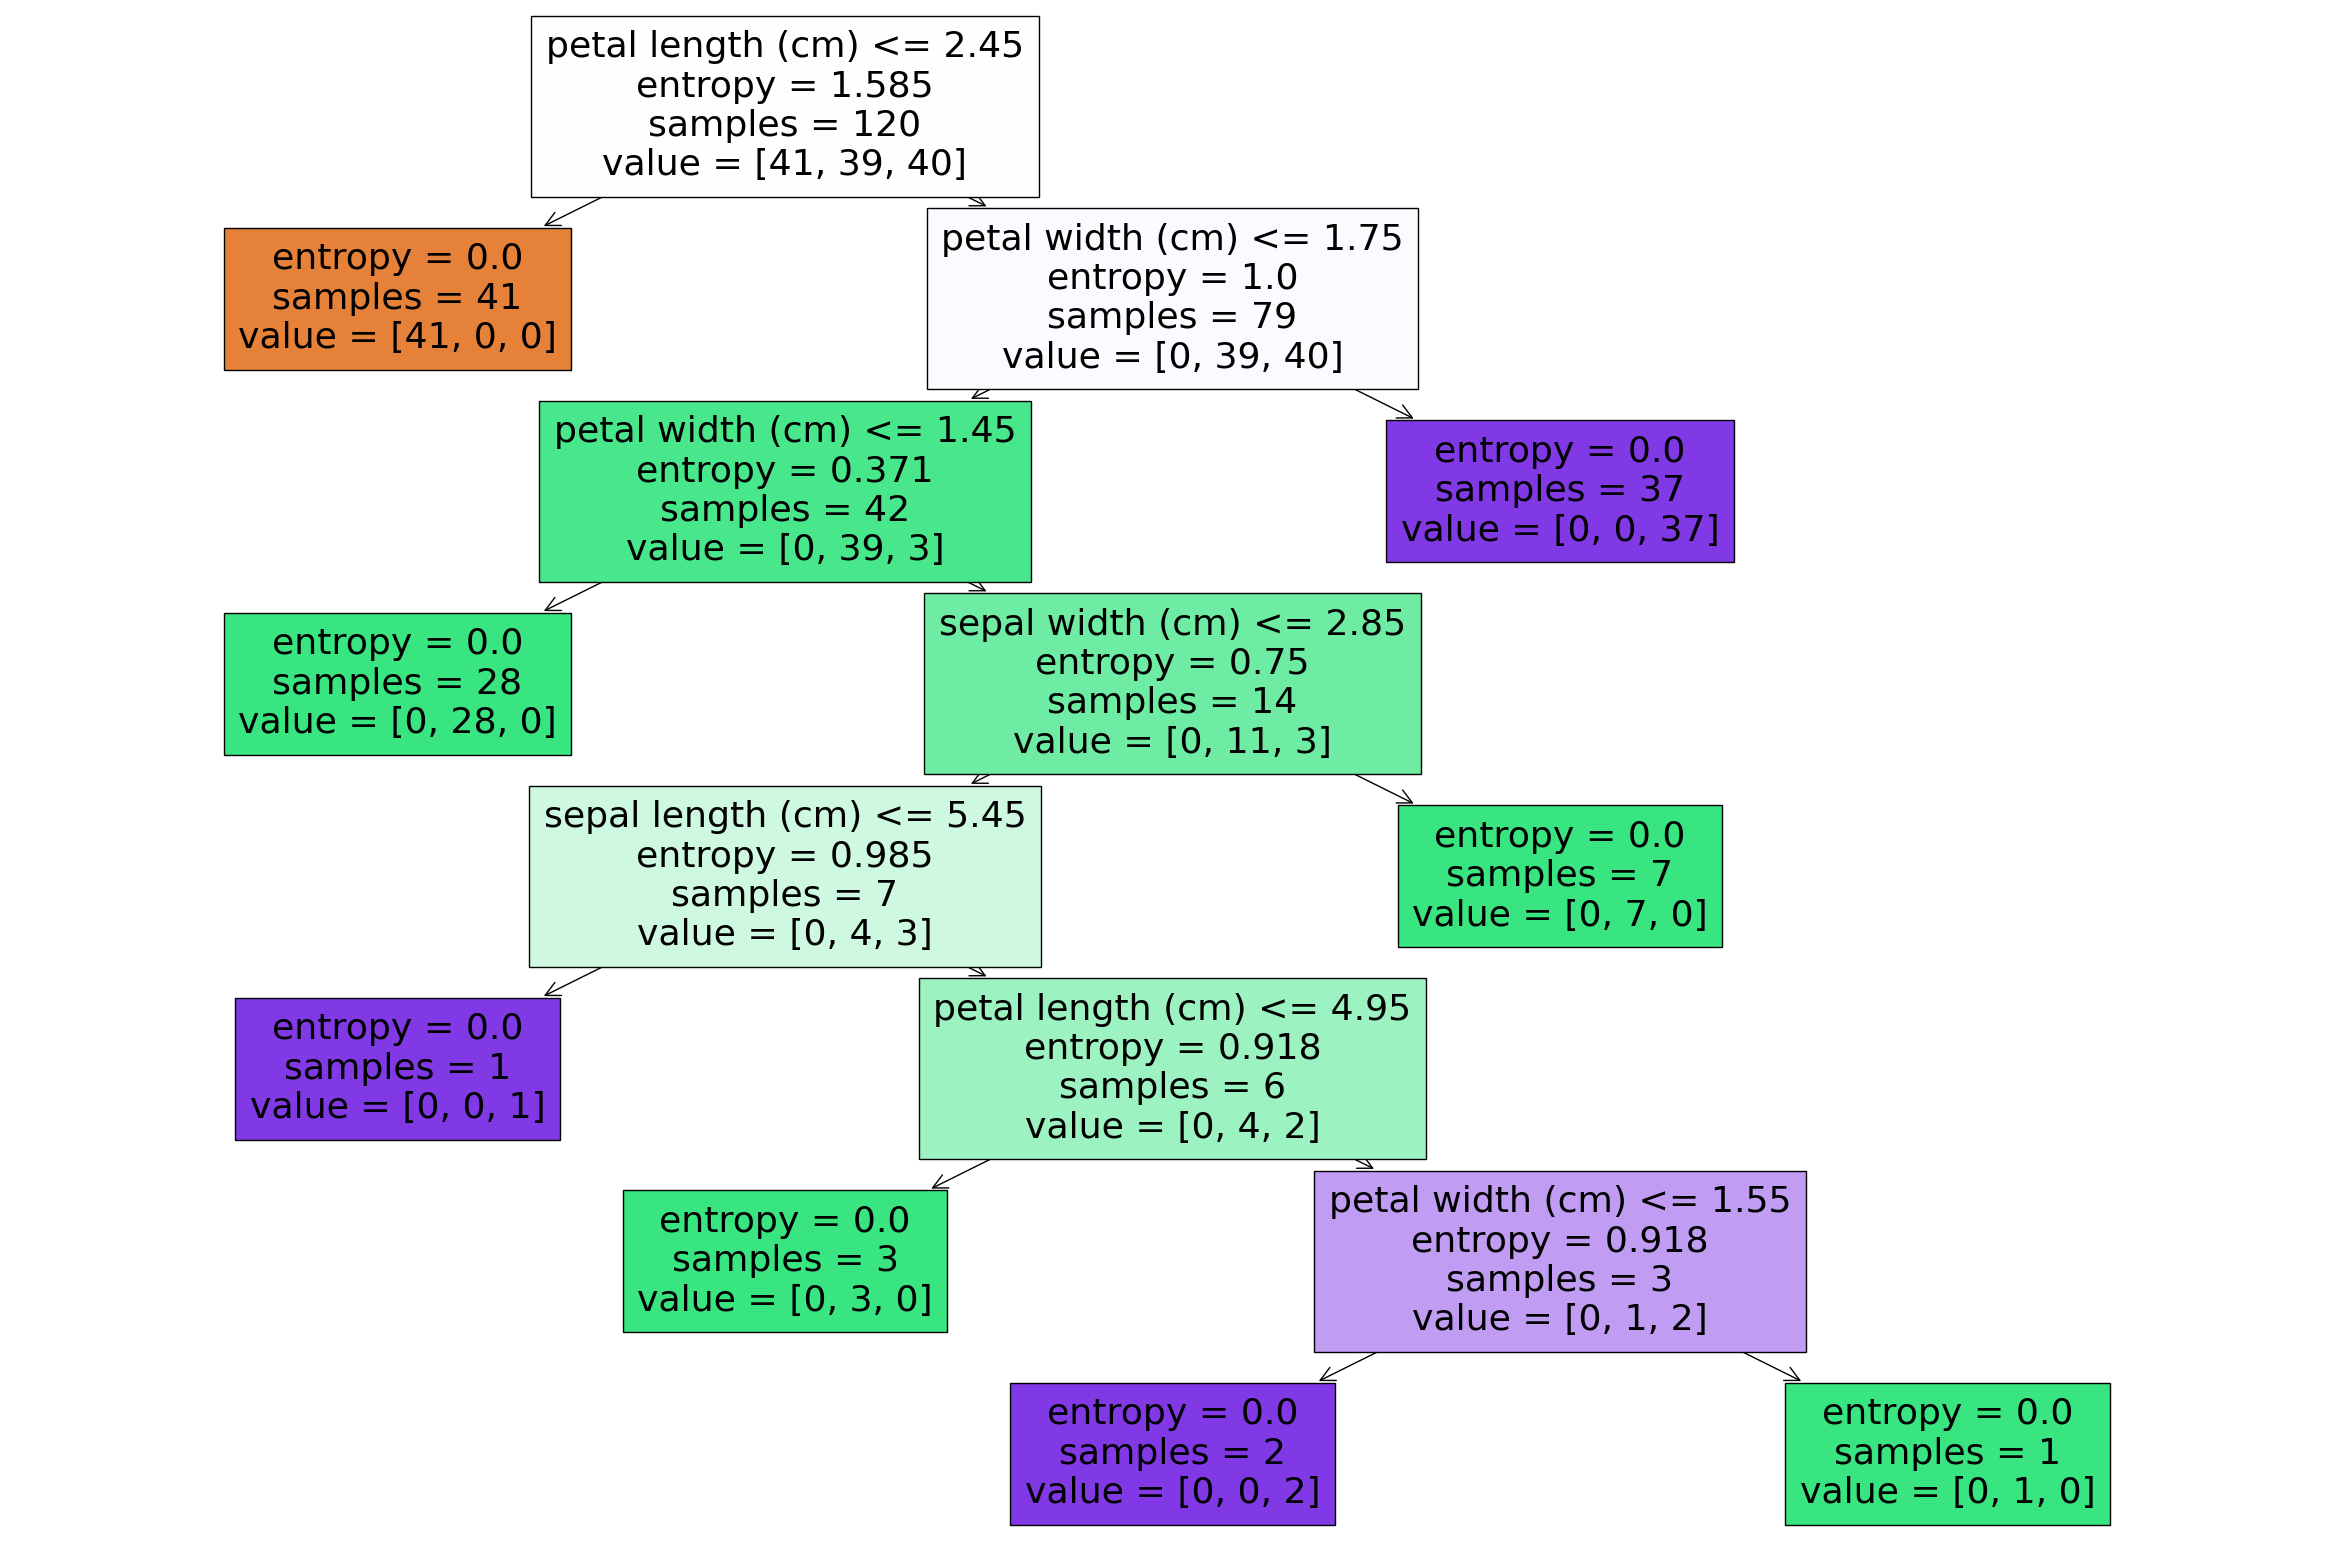

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(DT, feature_names=data.feature_names, filled=True)

### Decision Tree Text Visualization 
export_text

In [9]:
schema = tree.export_text(DT,feature_names=data.feature_names)
print(schema)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal width (cm) <= 1.45
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.45
|   |   |   |--- sepal width (cm) <= 2.85
|   |   |   |   |--- sepal length (cm) <= 5.45
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal length (cm) >  5.45
|   |   |   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- sepal width (cm) >  2.85
|   |   |   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



## Decision Tree Model Evaluation

In [10]:
from sklearn import metrics
print("DT Accuracy is: ", metrics.accuracy_score(y_test, yhat))

DT Accuracy is:  0.9


The scikit-learn documentation provides information on how to optimize decision tree models by exploring the various parameters. It's worth noting that the accuracy score for a decision tree model typically ranges between 0 and 1, with 1 indicating perfect accuracy and 0 indicating no accuracy. In this case, a score of 0.96 is quite good, especially considering that the model is a single tree rather than an ensemble. It's also worth mentioning that the maximum tree depth was not specified, so the tree was allowed to split as many times as necessary to increase prediction accuracy. However, for visualization purposes, a maximum depth of 4 was assigned.